# Download Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Dataset'

In [ ]:
%cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


In [ ]:
!ls

kaggle.json


In [ ]:
!kaggle datasets download -d minhhuy2810/rice-diseases-image-dataset

100% 12.0G/12.0G [03:17<00:00, 98.3MB/s]
100% 12.0G/12.0G [03:17<00:00, 65.1MB/s]


In [ ]:
!mkdir rice-diseases-image-dataset
!mv rice-diseases-image-dataset.zip rice-diseases-image-dataset

In [ ]:
%cd rice-diseases-image-dataset

/content/drive/My Drive/Dataset/rice-diseases-image-dataset


In [ ]:
!unzip rice-diseases-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_133840.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_133841.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_133953.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_133956.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_134124.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_134125.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_134126.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_134128.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_134129.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_134130.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_2992.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_2993.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_2998.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_2999.jpg  

# Cek Imbalanced Dataset

## Train Dataset

In [ ]:
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns

In [ ]:
def dataframe(lb_path, hsp_path, hlt_path, bs_path):
  lb_img = []
  target_lb_path = []
  for i in os.listdir(lb_path):
    pic = os.path.join(lb_path + "/", i)
    lb_img.append(pic)
    target_lb_path.append("leaf_blast")   

  hsp_img = []
  target_hsp_path = []
  for i in os.listdir(hsp_path):
    pic = os.path.join(hsp_path + "/", i)
    hsp_img.append(pic)
    target_hsp_path.append("hispa")

  hlt_img = []
  target_hlt_path = []
  for i in os.listdir(hlt_path):
    pic = os.path.join(hlt_path + "/", i)
    hlt_img.append(pic)
    target_hlt_path.append("healty")

  bs_img = []
  target_bs_path = []
  for i in os.listdir(bs_path):
    pic = os.path.join(bs_path + "/", i)
    bs_img.append(pic)
    target_bs_path.append("brown_spot")

  leaf_blast = pd.DataFrame()
  leaf_blast["image"] = lb_img
  leaf_blast["target"] = target_lb_path

  hispa = pd.DataFrame()
  hispa["image"] = hsp_img
  hispa["target"] = target_hsp_path

  healty = pd.DataFrame()
  healty["image"] = hlt_img
  healty["target"] = target_hlt_path

  brown_spot = pd.DataFrame()
  brown_spot["image"] = bs_img
  brown_spot["target"] = target_bs_path

  return leaf_blast, hispa, healty, brown_spot

In [ ]:
lb_path = '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/train/LeafBlast'
hsp_path = '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/train/Hispa'
hlt_path = '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/train/Healthy'
bs_path = '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/train/BrownSpot'

leaf_blast, hispa, healty, brown_spot = dataframe(lb_path, hsp_path, hlt_path, bs_path)
data_train = pd.concat([leaf_blast, hispa, healty, brown_spot], axis = 0, ignore_index = True)
data_train = shuffle(data_train)
data_train.head()

,image,target
293,/content/drive/MyDrive/Dataset/rice-diseases-i...,leaf_blast
1370,/content/drive/MyDrive/Dataset/rice-diseases-i...,brown_spot
536,/content/drive/MyDrive/Dataset/rice-diseases-i...,hispa
1218,/content/drive/MyDrive/Dataset/rice-diseases-i...,brown_spot
559,/content/drive/MyDrive/Dataset/rice-diseases-i...,hispa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


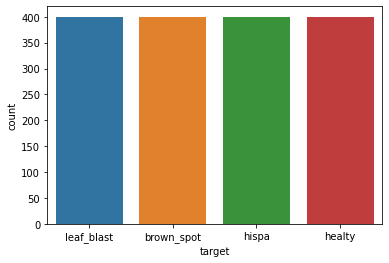

In [ ]:
sns.countplot(data_train["target"])

## Val Dataset

In [ ]:
lb_path = '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/validation/LeafBlast'
hsp_path = '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/validation/Hispa'
hlt_path = '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/validation/Healthy'
bs_path = '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/validation/BrownSpot'

leaf_blast, hispa, healty, brown_spot = dataframe(lb_path, hsp_path, hlt_path, bs_path)
data_val = pd.concat([leaf_blast, hispa, healty, brown_spot], axis = 0, ignore_index = True)
data_val = shuffle(data_val)
data_val.head()

,image,target
21,/content/drive/MyDrive/Dataset/rice-diseases-i...,leaf_blast
63,/content/drive/MyDrive/Dataset/rice-diseases-i...,leaf_blast
354,/content/drive/MyDrive/Dataset/rice-diseases-i...,healty
355,/content/drive/MyDrive/Dataset/rice-diseases-i...,healty
440,/content/drive/MyDrive/Dataset/rice-diseases-i...,brown_spot


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


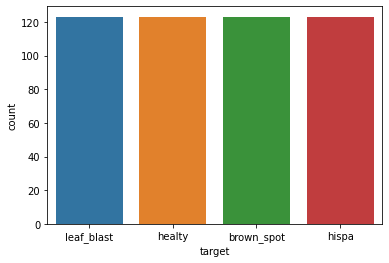

In [ ]:
sns.countplot(data_val["target"])

# Transfer Learning MobilenetV3

In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
!nvidia-smi

4/1AY0e-g681e-VWO3MFgitR7Z2xkJT0Kkb7t79DUEqvcJ505HW-BVYtSmn4RwTue Jun  1 08:06:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                          

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from keras.applications import MobileNetV2
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
import os
os.listdir('/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/validation')

['BrownSpot', 'Healthy', 'LeafBlast', 'Hispa']

In [ ]:
# re-size all the images to this
IMG_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/train'
valid_path = '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/validation'


## Model Building

In [ ]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of InceptionV3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [ ]:

IMG_SHAPE = IMG_SIZE + [3]
mobile_net = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in mobile_net.layers:
    layer.trainable = False

In [ ]:
glob('/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/train/*')

['/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/train/BrownSpot',
 '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/train/Hispa',
 '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/train/Healthy',
 '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/train/LeafBlast']

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/RiceDiseaseDataset/train/*')

In [ ]:
len(folders)

4

In [ ]:
# our layers - you can add more if you want
x = Flatten()(mobile_net.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobile_net.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 1600 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 492 images belonging to 4 classes.


In [ ]:
test_set.class_indices

{'BrownSpot': 0, 'Healthy': 1, 'Hispa': 2, 'LeafBlast': 3}

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss',
                                                 patience=3,
                                                 mode='min')

model.compile(loss='categorical_crossentropy', 
              optimizer= 'adam', 
             metrics = ['accuracy'])

history = model.fit(training_set, epochs = 50,
                    validation_data = test_set,                    
                    steps_per_epoch=len(training_set),
                    validation_steps=len(test_set),
                    callbacks=[early_stopping])

Epoch 1/15
25/25 [==============================] - 2462s 98s/step - loss: 5.7682 - accuracy: 0.3812 - val_loss: 3.7116 - val_accuracy: 0.4533
Epoch 2/15
25/25 [==============================] - 265s 11s/step - loss: 2.5651 - accuracy: 0.5400 - val_loss: 2.2545 - val_accuracy: 0.5081
Epoch 3/15
25/25 [==============================] - 256s 10s/step - loss: 1.7176 - accuracy: 0.6019 - val_loss: 2.7036 - val_accuracy: 0.4614
Epoch 4/15
25/25 [==============================] - 250s 10s/step - loss: 1.7335 - accuracy: 0.6106 - val_loss: 2.4344 - val_accuracy: 0.4919
Epoch 5/15
25/25 [==============================] - 245s 10s/step - loss: 1.5974 - accuracy: 0.6506 - val_loss: 2.5659 - val_accuracy: 0.5183


In [ ]:
import matplotlib.pyplot as plt

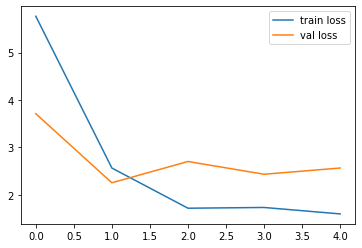

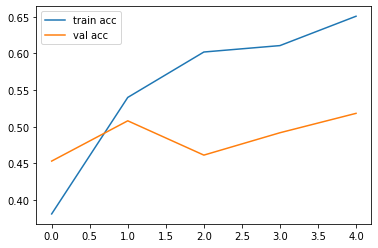

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
test_path = '/content/drive/MyDrive/Dataset/rice-diseases-image-dataset/LabelledRice/Labelled'

In [ ]:
test_data = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 3355 images belonging to 4 classes.


In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

In [ ]:
img=image.load_img('/content/dis_leaf (61)_iaip.jpg',target_size=(224,224))
x=image.img_to_array(img)
x=x/255


In [ ]:
print(uploaded)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(224, 224))
  
  x=image.img_to_array(img)
  x=x/255         
  x=np.expand_dims(x, axis=0)
  #images = np.vstack([x])
  x = preprocess_input(x)
  classes = model.predict(x, batch_size=10)
  
  print(classes)

Saving IMG_20190424_134128.jpg to IMG_20190424_134128.jpg
Saving IMG_20190424_134130.jpg to IMG_20190424_134130.jpg
Saving IMG_20190424_134028.jpg to IMG_20190424_134028.jpg
Saving IMG_20190424_134109.jpg to IMG_20190424_134109.jpg
Saving IMG_20190424_131225.jpg to IMG_20190424_131225.jpg
Saving IMG_20190424_133938.jpg to IMG_20190424_133938.jpg
Saving IMG_20190420_195011.jpg to IMG_20190420_195011.jpg
Saving IMG_20190424_133722.jpg to IMG_20190424_133722.jpg
[[9.0949029e-01 4.8077308e-02 8.0853162e-05 4.2351551e-02]]
[[0.74338424 0.12574722 0.05382783 0.07704071]]
[[1.4592548e-05 8.6983494e-02 9.1296118e-01 4.0697505e-05]]
[[0.16573344 0.01328325 0.62573934 0.19524392]]
[[9.0337071e-06 8.8143488e-06 9.9371415e-01 6.2679453e-03]]
[[2.9683326e-05 9.9860841e-01 1.3610730e-03 9.2188606e-07]]
[[1.2098512e-01 8.5675955e-09 1.3889661e-09 8.7901491e-01]]
[[7.8116325e-03 1.9305280e-05 1.7988393e-01 8.1228518e-01]]


In [ ]:
img=image.load_img('/content/IMG_20190420_195011.jpg', target_size=(224, 224))
  
x=image.img_to_array(img)
x=x/255         
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
x = preprocess_input(x)
classes = model.predict(x, batch_size=10)

print(classes)

[[1.2098512e-01 8.5675955e-09 1.3889661e-09 8.7901491e-01]]


In [ ]:
max([1.2098512e-01, 8.5675955e-09, 1.3889661e-09, 8.7901491e-01])

0.87901491

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('beras_mobilenetV3.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('beras_mobilenetV3.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("beras_mobilenetV3.tflite", "wb").write(tflite_model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmpqh6omie0/assets


9863392